In [1]:
import time
start_time = time.perf_counter()

### Imported Libraries

In [2]:
%matplotlib inline
# version check
import numpy
print('The numpy version is {}.'.format(numpy.__version__))
import pandas
print('The pandas version is {}.'.format(pandas.__version__))
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
import matplotlib
print('The matplotlib version is {}.'.format(matplotlib.__version__))
import regex
print('The regex version is {}.'.format(regex.__version__))
import sys
print('python version: %s' % (sys.version))

The numpy version is 1.19.2.
The pandas version is 1.1.3.
The scikit-learn version is 0.23.2.
The matplotlib version is 3.3.2.
The regex version is 2.5.86.
python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [3]:
# set random state for reproducibility
random_state = 42

# default numpy settings
import numpy as np
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 80

# update settings
import numpy as np
np.set_printoptions(edgeitems=15, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))

# update pandas settings
import pandas as pd
pd.set_option('max_colwidth', 200)
pd.options.display.max_rows = 250

### Read in, explore data

In [4]:
df = pd.read_csv('./raw/creditcard.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Class column represents fraudulent data, where 0 = not fraudulent and 1 = fraudulent
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

## Preprocessing, Scale data

In [10]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
robust_scaler = preprocessing.RobustScaler()
minmax_scaler = preprocessing.MinMaxScaler()

time_raw = df.Time.values.reshape(-1,1)                                   # perform the different scaling
time_standard_scaled = standard_scaler.fit_transform(time_raw)
time_robust_scaled = robust_scaler.fit_transform(time_raw)

amount_raw = df.Amount.values.reshape(-1,1)
amount_standard_scaled = standard_scaler.fit_transform(amount_raw)
amount_robust_scaled = robust_scaler.fit_transform(amount_raw)

time_compare = pd.DataFrame(                                               # to see scaling side-by-side if desired
    {
    'time_raw' : time_raw.reshape(1,-1)[0],
    'time_standard_scaled' : time_standard_scaled.reshape(1,-1)[0],
    'time_robust_scaled' : time_robust_scaled.reshape(1,-1)[0]
}
)

amount_compare = pd.DataFrame(
    {
    'amount_raw' : amount_raw.reshape(1,-1)[0],
    'amount_standard_scaled' : amount_standard_scaled.reshape(1,-1)[0],
    'amount_robust_scaled' : amount_robust_scaled.reshape(1,-1)[0]
}
)

df['time_robust_scaled'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1,1))         # update dataframe
df['amount_robust_scaled'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1,1))     
df.drop(['Time','Amount'], axis=1, inplace=True)

time_robust_scaled_df = df['time_robust_scaled']                                                # move scaled columns to front of data frame
amount_robust_scaled_df = df['amount_robust_scaled']
df.drop(['time_robust_scaled', 'amount_robust_scaled'], axis=1, inplace=True)                  
df.insert(0, 'time_robust_scaled', time_robust_scaled_df)
df.insert(1, 'amount_robust_scaled', amount_robust_scaled_df)

#amount_scaled = scaler.fit_transform(df.Amount)

### Assign feature sets

In [11]:
def resample_frame(df, n=len(df), random_state=random_state):
    df = df.sample(n=n, random_state=random_state).reset_index(drop=True)
    return df

df = resample_frame(df) # resampled

In [12]:
def assign_features(df, n_samples=len(df)):
    while True:
        _df = df.copy()
        _df = resample_frame(_df)[:n_samples]
        
        if len(_df.Class[_df.Class == 1]) > 0:
            break
        print('Sampled again due to no dependent variables!')
        
    X = _df.drop('Class', axis=1)    # drop the output series from the dataset to isolate inputs (independent features)
    y = _df['Class']    # set y to the output series (dependent feature)
    
    return X,y

X,y = assign_features(df,1000) # assign features for 1000 samples
print('Number of dependent variables: %i (%g%%)' % (len(y[y==1]), len(y[y==1])/len(y)))

Number of dependent variables: 3 (0.003%)


# Review Models
 scoring parameter full list: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [13]:
master_n_samples = len(df)
run_these = ['RFC','LSVC','LOGR','KNN'] # leave out MNB (not relevant) SGDC (redundancy with LSVC) 

In [14]:
def plot_multi(X, y, scoring_param, n_samples=1000, run_these=[], test_size=0.3, random_state=42, max_Rfc_depth=25, CV=5):
        
#    X = df.drop('Class', axis=1)     # drop the output series from the dataset to isolate inputs (independent features)
#    y = df['Class']     # set y to the output series (dependent feature)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier
    from sklearn.svm import LinearSVC
    from sklearn.neighbors import KNeighborsClassifier

    name_dict = {
        'RandomForestClassifier':'RFC',
        'LinearSVC': 'LSVC',
        'MultinomialNB':'MNB',
        'LogisticRegression':'LOGR',
        'SGDClassifier':'SGDC',
        'KNeighborsClassifier':'KNN',
    }
    models = [
        LogisticRegression(random_state=random_state),
        SGDClassifier(),
        LinearSVC(),
        RandomForestClassifier(max_depth=max_Rfc_depth, random_state=random_state),
        MultinomialNB(),
        KNeighborsClassifier(),
    ]
    
    # create dataframe, list for data catch
    cv_df = pd.DataFrame(index=range(CV * len(models)))
    entries = []

    from sklearn.model_selection import cross_val_score # loop models, return accuracy
    for model in models:
        model_name = name_dict[model.__class__.__name__]
        if model_name in run_these:
            scores = cross_val_score(model, X_train, y_train, scoring=scoring_param, cv=CV, n_jobs=-1)
            for fold_idx, score in enumerate(scores):
                entries.append((model_name, fold_idx, score))
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', scoring_param])
        sns.boxplot(x='model_name', y=scoring_param, data=cv_df)
        sns.stripplot(x='model_name', y=scoring_param, data=cv_df, 
                      size=8, jitter=True, edgecolor="gray", linewidth=2)
        plt.title('n_samples: {}'.format(n_samples))
        plt.grid(axis='y', which='both')
        plt.xlabel('Classifiers')

### Evaluate accuracy across models

<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is

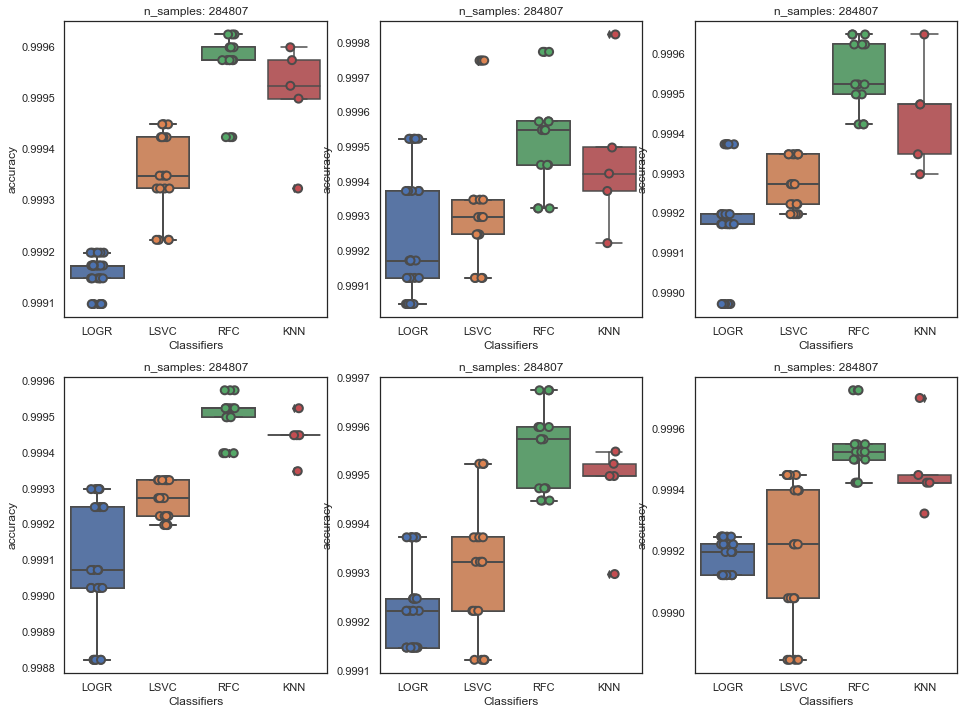

Wall time: 34min 42s


In [15]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
iter_ct = 6
iter_this = np.linspace(1,iter_ct,iter_ct)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='accuracy', n_samples=master_n_samples, run_these=run_these)

plt.show()

### Evaluate f1_macro across models

<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is depre

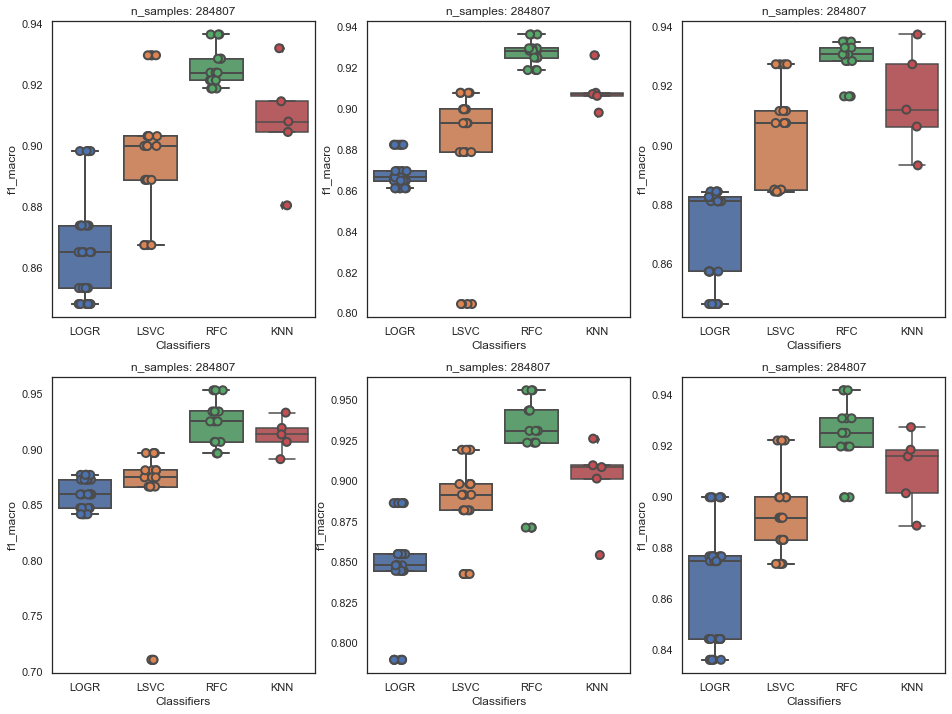

Wall time: 32min 14s


In [16]:
%%time
plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='f1_macro', n_samples=master_n_samples, run_these=run_these)

plt.show()

### Evaluate precision across models

<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is depre

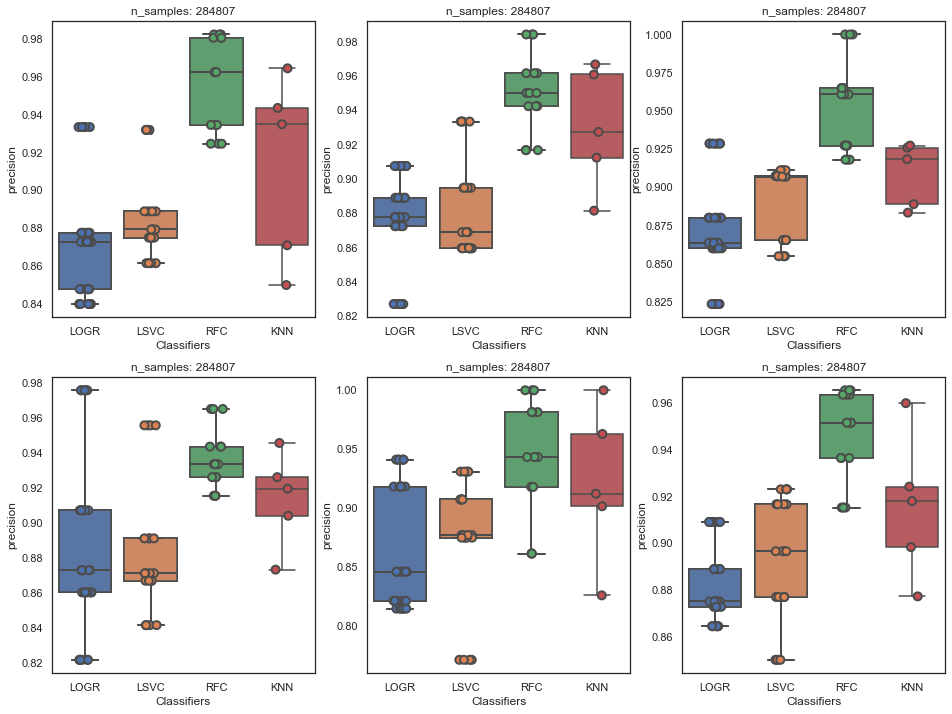

Wall time: 32min 18s


In [17]:
%%time
plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='precision', n_samples=master_n_samples, run_these=run_these)

plt.show()

### Evaluate recall across models

<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
<timed exec>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is depre

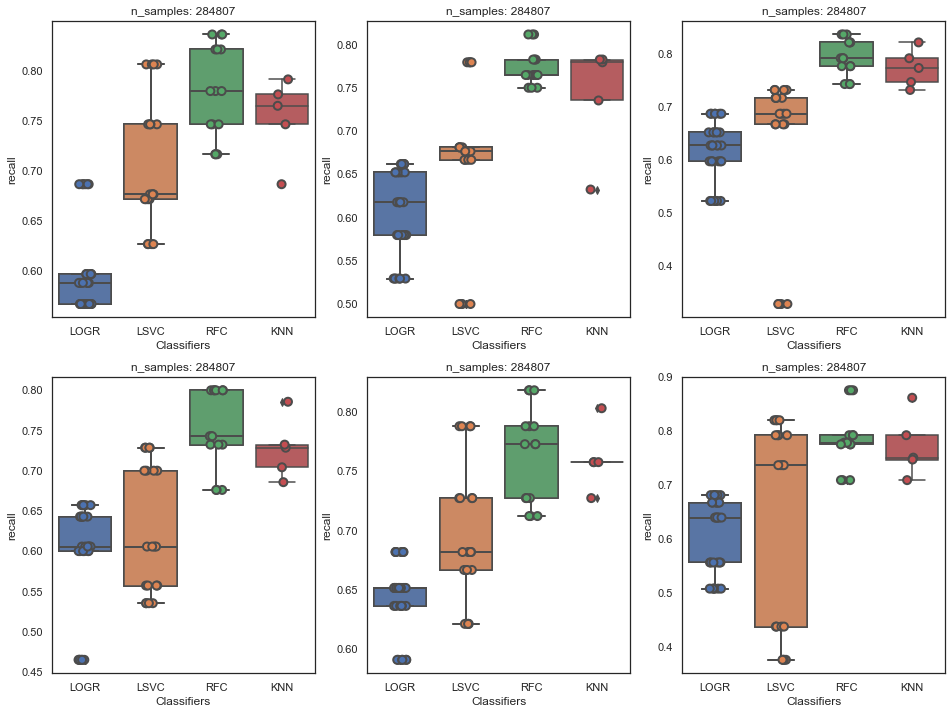

Wall time: 32min 28s


In [18]:
%%time
plt.figure(figsize=(16,12), facecolor='w', edgecolor='k')
for i in iter_this:
    df = resample_frame(df) # resample frame
    X,y = assign_features(df,master_n_samples) # reassign features
    plt.subplot(2, 3, i)
    plot_multi(X, y, scoring_param='recall', n_samples=master_n_samples, run_these=run_these)

plt.show()